In [86]:
import pandas as pd
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import matplotlib

복잡한거는 빌드업으로 글로 적으면서 단계별로 해보자

In [87]:
news = pd.read_excel('.\\파이썬+텍스트+분석+입문\\파이썬 텍스트 분석 입문\\data\\NewsResult_20211120-20211121.xlsx')

C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [88]:
def filter(news,*words):
    words = '|'.join(words)
    news = news[news['본문'].str.contains(words)]
    news = news.reset_index(drop=True)
    return news

news = filter(news,'백신','부스터')
    

In [89]:
def tokenizer(news):
    words = Mecab().nouns(news)
    return [word for word in words if len(word)>1]

In [90]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.95, min_df=2, max_features=5000)
DW_matrix = vectorizer.fit_transform(news['본문'])

In [91]:
nmf = NMF(n_components=3, alpha=0.2, random_state=3)
DT = nmf.fit_transform(DW_matrix)
TW = nmf.components_

C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [92]:
def print_top_words(TW, word, title, n_top_words=5):
    for topic_idx, word_vec in enumerate(TW): 
        message = 'Topic %d: ' %topic_idx
        message += ' '.join(['#'+word[id] for id in word_vec.argsort()[:-n_top_words-1:-1]])
        message += '\n\n'+'\n'.join([title[id] for id in DT.T[topic_idx].argsort()[:-n_top_words-1:-1]])
        print(message+'\n')

print_top_words(TW, vectorizer.get_feature_names(), news['제목'])

Topic 0: #성인 #부스터 #모더 #미국 #화이자

CDC "미국 성인 모두 화이자 모더나 부스터샷 맞아야" 권고
FDA, 화이자 모더나 부스터샷 모든 성인으로 확대 승인
美 FDA, 전 성인 대상으로 모더나 화이자 부스터샷 확대 승인
美 보건당국 "18세 이상 부스터샷 맞으라" 대상 확대
FDA, 화이자 모더나 부스터샷 모든 성인에 확대

Topic 1: #대통령 #국민 #대화 #문재인 #감염

文대통령 "백신 3차접종 이뤄지면 '돌파감염' 사례 줄어들 것"
​문 대통령 “완벽한 백신 없다 3차 접종되면 돌파감염 줄어들 것”
文대통령 "5~12세 안전하고 효과있다면 백신접종 할 것"
文대통령 "백신접종률 확대, 청소년 연소자까지 대상 늘리는 게 중요"
문 대통령 “돌파감염 매뉴얼 없어 죄송  부스터샷 이뤄지면 돌파감염 줄어들 것”

Topic 2: #코로나 #확진 #접종 #백신 #완료

전국민 10명 중 8명 접종완료했지만, 전면등교 직전 학생완료율은 ‘저조’
독일, 코로나19 확진 폭증에 불안...미접종자 압박 강화
軍 코로나 7명 추가확진, 누적 2,182명...전원 돌파감염
"학교 무사히 다녀오겠습니다" 확진자 3000명에도 내일부터 전면등교
다음 주부터 수도권 학교도 전면 등교...확진자 급증에 불안불안



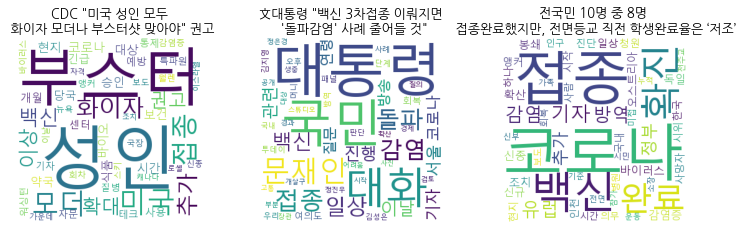

In [94]:
wordcloud = WordCloud(
    font_path="C:\\windows\\fonts\\malgun.ttf", # 폰트 경로
    width = 300, 
    height = 300,
    max_words=50,
    random_state=1,
    background_color="white"
    )   
matplotlib.rcParams['font.family'] = 'NanumGothic'


plt.figure(figsize=(12,4))
#{DOCUMENT['TITLE']+TOPIC(DOCUMENT(WORD_NAME-WORD_SCORE))}
#1. 문서-토픽과의 관계에서 가장 연관이 있는 토픽으로 문서를 묶어준다.
#2. 1.에서 묶어준 문서의 '단어이름 - 단어'의 점수를 매긴다.(word_score) wordcloud를 만든다.
#3 가장 토픽과 밀접한 관계를 맺는 document의 title를 찾는다.

news['topic'] = DT.argmax(axis=1)

for topic_idx in range(3):
    doc_idx = news.index[news['topic'] == topic_idx]
    word_score = DW_matrix.toarray()[doc_idx].sum(0)
    d = dict(zip(vectorizer.get_feature_names(),word_score))
    wordcloud.generate_from_frequencies(d)

    plt.subplot(1,3,topic_idx+1)
    title = news.loc[DT[:,topic_idx].argmax(),'제목']
    title = title.split()
    i = len(title) // 2
    title = ' '.join(title[:i]+['\n']+title[i:])
    plt.title(title, fontsize=13)
    plt.imshow(wordcloud)
    plt.axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()



# news['topic'] = DT.argmax(axis=1) #y축을 삭제하고 x축만 남겨놓는 과정

# for topic_idx in range(3):
#     word_score = DW_matrix.toarray()[news['topic'] == topic_idx].sum(0)
#     d = dict(zip(vectorizer.get_feature_names(),word_score))
#     wordcloud.generate_from_frequencies(d)
#      #2

#     plt.subplot(1,3,topic_idx+1)
#     title = news.loc[DT[:,topic_idx].argmax(),'제목']
#      #3
#     title = title.split()
#     i = len(title) // 2
#     title = ' '.join(title[:i]+['\n']+title[i:])
#     plt.title(title, fontsize=13)
#     plt.imshow(wordcloud)
#     plt.axis('off')


    
# # #토픽과 가장 관련있는 문서들의 단어로 wordcloud를 만들자
# # news['topic'] = DT.argmax(axis=1) 
# #  #문서에 가장 연관된 토픽을 찾고 칼럼만들기
# # plt.figure(figsize=(12,4))
# # #dw =dt tw

# # for idx in range(3):
# #     topic_idx = news.index[news['topic'] == idx]
# #     word_score = DW_matrix.toarray()[topic_idx].sum(0)
# #     d = dict(zip(vectorizer.get_feature_names(),word_score))
# #     wordcloud.generate_from_frequencies(d)

# #     plt.subplot(1,3,idx+1)
# #     title = news.loc[DT[:,idx].argmax(),'제목']
#     title = title.split()
#     i = len(title) // 2
#     title = ' '.join(title[:i]+['\n']+title[i:])
#     plt.title(title, fontsize=13)
#     plt.imshow(wordcloud)
#     plt.axis('off')

# plt.subplots_adjust(wspace=0.3, hspace=0.3)
# plt.show()

topic내의 단어에 대한 wordcloud와 토픽을 대표하는 기사의 제목

topic관련 수치 가장 높은 topic의 index찾아 반환

wordcloud에 (단어,단어개수) 넣어주면됨

4x4에 한개 들어간다하자

In [96]:
title = '윤석열 국민의힘 대선후보와 고위공직자범죄수사처(공수처) 간 힘겨루기가 계속될 모양새다. 공수처가 윤 후보에 대한 수사에서 결정적인 한 방을 내놓고 있지 못한 데다 윤 후보 측도 공수처의 요구사항에 순순히 응하고 있지 않기 때문이다.'
title = title.split()
print(title)
i = len(title) // 2
title = ' '.join(title[:i]+['\n']+title[i:])
print(title)

['윤석열', '국민의힘', '대선후보와', '고위공직자범죄수사처(공수처)', '간', '힘겨루기가', '계속될', '모양새다.', '공수처가', '윤', '후보에', '대한', '수사에서', '결정적인', '한', '방을', '내놓고', '있지', '못한', '데다', '윤', '후보', '측도', '공수처의', '요구사항에', '순순히', '응하고', '있지', '않기', '때문이다.']
윤석열 국민의힘 대선후보와 고위공직자범죄수사처(공수처) 간 힘겨루기가 계속될 모양새다. 공수처가 윤 후보에 대한 수사에서 결정적인 한 
 방을 내놓고 있지 못한 데다 윤 후보 측도 공수처의 요구사항에 순순히 응하고 있지 않기 때문이다.


나누기 연산 후 소숫점 이하 수 버리기